# Analyzing job vacancies

In [48]:
from datetime import datetime as dt

import numpy as np
print('Numpy version:', np.__version__)
import pandas as pd
print('Pandas version:', pd.__version__)
import matplotlib as mpl
print('Matplotlib version:', mpl.__version__)
import matplotlib.pyplot as plt
import seaborn as sns
print('Seaborn version:', sns.__version__)

import nltk
print('nltk version:', nltk.__version__)

import folium
print('Folium version:', folium.__version__)

Numpy version: 1.23.5
Pandas version: 1.5.2
Matplotlib version: 3.6.2
Seaborn version: 0.12.1
nltk version: 3.7
Folium version: 0.13.0


### Joining partial datasets

In [2]:
csv1_filename = 'datasets/vacancies-no-duplicates-augm-2022-11-27.csv'
csv2_filename = 'datasets/vacancies-data-scientist-2022-11-27.csv'

In [3]:
df1 = pd.read_csv(csv1_filename, index_col=0)
df1.head()

,vacancy_name,company_name,company_dept,area,address,latitude,longitude,salary_from,salary_to,salary_currency,salary_gross,publication_time,last_changed,schedule,req,resp,cond,skills
vacancy_id,,,,,,,,,,,,,,,,,,
72750262,Ведущий аналитик (качество данных\Data quality),Банк ВТБ (ПАО),NaN,1,"Москва, Пресненская набережная, 10с1",55.748914,37.535466,NaN,NaN,NaN,NaN,2022-11-23 07:08:44,2022-11-23 07:08:44,FULL_DAY,Высшее образование. Опыт работы в качестве ана...,"Мониторинг качества данных, организация процес...",Трудоустройство согласно Законодательству. Кон...,NaN
72674818,Аналитик данных,Городские информационные системы,NaN,1,NaN,NaN,NaN,120000.0,180000.0,RUR,False,2022-11-27 09:36:56,2022-11-27 10:21:43,FULL_DAY,"...заданий, валидация данных. Особенности OLAP...","...SQL-запросы, хранимые процедуры, вьюшки. Ви...",Удалённая работа. Уютный коллектив. Минимум бю...,NaN
72527010,Аналитик базы данных,Вектор,NaN,1,"Красногорск, бульвар Строителей, 4к1",55.814462,37.385412,70000.0,NaN,RUR,False,2022-11-27 08:32:14,2022-11-27 09:21:16,FULL_DAY,Умение обрабатывать большие объемы данных и ви...,...данных и подготовка информации для расчетов...,"График: 5/2 , с 8:00 до 17:00,выходные: суббот...",NaN
70839955,Аналитик данных (Data Office),"VK, ВКонтакте","VK, ВКонтакте",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-27 07:02:13,2022-11-27 07:02:13,FULL_DAY,Понимаете основные продуктовые и бизнес-метрик...,Плотно взаимодействовать на ежедневной основе ...,NaN,NaN
72943931,Аналитик ГЕО данных,ГАУ ИНСТИТУТ ГЕНПЛАНА МОСКВЫ,NaN,1,"Москва, 2-я Брестская улица, 2/14",55.769641,37.593121,NaN,NaN,NaN,NaN,2022-11-25 13:00:40,2022-11-26 19:50:13,FULL_DAY,Хорошее знание инструментов WEB-картографии и ...,Интеграция данных из различных источников в ед...,"Стабильная заработная плата, включающая оклад,...",NaN


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 72750262 to 72069888
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   vacancy_name      250 non-null    object 
 1   company_name      250 non-null    object 
 2   company_dept      65 non-null     object 
 3   area              250 non-null    int64  
 4   address           132 non-null    object 
 5   latitude          130 non-null    float64
 6   longitude         130 non-null    float64
 7   salary_from       27 non-null     float64
 8   salary_to         22 non-null     float64
 9   salary_currency   39 non-null     object 
 10  salary_gross      39 non-null     object 
 11  publication_time  250 non-null    object 
 12  last_changed      250 non-null    object 
 13  schedule          250 non-null    object 
 14  req               249 non-null    object 
 15  resp              250 non-null    object 
 16  cond              227 non-null  

In [5]:
df2 = pd.read_csv(csv2_filename, index_col=0)
df2.head()

,vacancy_name,company_name,company_dept,area,address,latitude,longitude,salary_from,salary_to,salary_currency,salary_gross,publication_time,last_changed,schedule,req,resp,cond,skills
vacancy_id,,,,,,,,,,,,,,,,,,
71426958,Data Scientist (команда Поиска),HeadHunter::Analytics/Data Science,HeadHunter::Analytics/Data Science,1,"Москва, улица Годовикова, 9с10",55.809343,37.628505,350000.0,NaN,RUR,True,2022-11-22 10:01:59,2022-11-22 13:59:41,FULL_DAY,Опыт реализации и применения моделей машинного...,Развитие моделей поискового ранжирования и рек...,Возможность выбора места работы: удаленно или ...,NaN
71757739,Аналитик/data science,Смартсофт,NaN,1,"Москва, Нижний Сусальный переулок",55.761355,37.662659,NaN,NaN,NaN,NaN,2022-11-27 07:31:08,2022-11-27 08:19:38,FULL_DAY,Высшее техническое образование (IT или физмат)...,"Участие в задачах, связанных с анализом больши...","Работу в центре Москвы возле метро ""Курская"", ...",NaN
71908944,Ведущий специалист отдела математического моде...,Eqvanta,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-27 07:57:44,2022-11-27 08:20:14,REMOTE,Опыт работы в data science от 2х лет. Высшее м...,Работу над актуальными финтех-продуктами. Полн...,Продуктивную и вдохновляющую атмосферу. Понятн...,NaN
72819441,Data Scientist / Аналитик Data Science,ПроКомплаенс,NaN,1,"Москва, 1-й переулок Тружеников, 14с8",55.737938,37.571516,NaN,NaN,NaN,NaN,2022-11-26 15:14:05,2022-11-26 15:20:30,FULL_DAY,Опыт работы над прикладными задачами или решен...,Выявление и связывание ключевой информации в к...,"Оформление по ТК РФ (оплата отпуска, больничны...",NaN
71523297,Data Scientist (Senior),"билайн: ИТ, Data, Digital","билайн: ИТ, Data, Digital",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-26 16:04:20,2022-11-26 16:19:13,REMOTE,"Мы рассчитываем, что у тебя есть опыт и знания...",Решать бизнес-задачи с помощью анализа данных ...,NaN,NaN


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 71426958 to 71923183
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   vacancy_name      191 non-null    object 
 1   company_name      191 non-null    object 
 2   company_dept      75 non-null     object 
 3   area              191 non-null    int64  
 4   address           84 non-null     object 
 5   latitude          82 non-null     float64
 6   longitude         82 non-null     float64
 7   salary_from       18 non-null     float64
 8   salary_to         17 non-null     float64
 9   salary_currency   23 non-null     object 
 10  salary_gross      23 non-null     object 
 11  publication_time  191 non-null    object 
 12  last_changed      191 non-null    object 
 13  schedule          191 non-null    object 
 14  req               190 non-null    object 
 15  resp              190 non-null    object 
 16  cond              172 non-null  

In [10]:
df = pd.concat([df1, df2])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 72750262 to 71923183
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   vacancy_name      441 non-null    object 
 1   company_name      441 non-null    object 
 2   company_dept      140 non-null    object 
 3   area              441 non-null    int64  
 4   address           216 non-null    object 
 5   latitude          212 non-null    float64
 6   longitude         212 non-null    float64
 7   salary_from       45 non-null     float64
 8   salary_to         39 non-null     float64
 9   salary_currency   62 non-null     object 
 10  salary_gross      62 non-null     object 
 11  publication_time  441 non-null    object 
 12  last_changed      441 non-null    object 
 13  schedule          441 non-null    object 
 14  req               439 non-null    object 
 15  resp              440 non-null    object 
 16  cond              399 non-null  

Now we can see there are many Nan values. These Nans are mostly in location fields ('address', 'lat' and 'long') and salary (why?). And we can totally drop 'skills' column as it's empty, 'company_dept' as it contains too many NANs  
'area' feature can be deleted as well as we look only on vacancies in Moscow  

In [11]:
df.drop(columns=['skills', 'company_dept'], inplace=True)

In [12]:
df['area'].value_counts()

1    441
Name: area, dtype: int64

In [13]:
df.drop(columns='area', inplace=True)

As index (vacancy_id) is the unique key for vacancy we can check on duplicates using index only

In [33]:
m = df.reset_index().duplicated(subset=['vacancy_id'], keep=False)
m.index = df.index
df[m]

,vacancy_name,company_name,address,latitude,longitude,salary_from,salary_to,salary_currency,salary_gross,publication_time,last_changed,schedule,req,resp,cond
vacancy_id,,,,,,,,,,,,,,,
72177207,Аналитик данных / Data scientist,СтандартПроект,"Москва, улица Станиславского, 21с2",55.745716,37.663539,NaN,NaN,NaN,NaN,2022-11-25 11:20:00,2022-11-25 11:20:40,FULL_DAY,статистики. 8. Основы машинного обучения. 9. О...,20% Взаимодействие с заказчиками и подрядчикам...,2. Участия и победы в конкурсах и хакатонах. М...
72816947,Аналитик данных (data science),Корпорация ЭЛАР,"Москва, Бумажный проезд, 14с2",55.789902,37.586904,NaN,NaN,NaN,NaN,2022-11-23 14:30:47,2022-11-23 14:30:47,FULL_DAY,"Python 3.8+, SQL Alchemy, Redis, Numpy Pandas,...","Участие в постановке задач, подготовке ТЗ совм...",Участие в крупнейшем социально-значимом проект...
71644645,Главный эксперт по анализу данных (data analys...,АК АЛРОСА,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-22 02:16:44,2022-11-22 02:16:44,FULL_DAY,...аналитики данных. Владение стеком технологи...,...и интерпретация данных для поиска закономер...,Работа в одной из крупнейших компаний как в Ро...
66550927,Аналитик данных / Data Scientist,ГКУ Инфогород,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-07 08:53:59,2022-11-22 21:00:00,FULL_DAY,Высшее математическое / техническое образовани...,Контроль качества данных в хранилище. Организа...,Интересные проекты. Значимая роль в молодой ко...
70852713,Аналитик данных (data analyst / data scientist),"Бристоль, сеть магазинов","Москва, 1-й Красногвардейский проезд, 15",55.750520,37.539401,172000.0,230000.0,RUR,True,2022-11-02 07:52:12,2022-11-27 07:56:30,FULL_DAY,Высшее образование (техническое; экономическое...,"Прогнозирование спроса, построение предиктивны...",Официальное трудоустройство по ТК РФ. Белая з/...
72462241,Senior Data Scientist / Аналитик данных,Netex24,"Москва, Замоскворецкая линия, метро Динамо",55.789704,37.558212,NaN,250000.0,RUR,False,2022-11-17 09:07:24,2022-11-24 13:00:55,FULL_DAY,Опыт применения широкого спектра алгоритмов дл...,"...товаров и услуг, подбор целевой аудитории, ...",Коворкинг А-класса в Москве на м. Динамо (удал...
72177207,Аналитик данных / Data scientist,СтандартПроект,"Москва, улица Станиславского, 21с2",55.745716,37.663539,NaN,NaN,NaN,NaN,2022-11-25 11:20:00,2022-11-25 11:20:40,FULL_DAY,Обязательно: 1. Опыт работы аналитиком от 1 го...,1. 20% Взаимодействие с заказчиками и подрядчи...,2. Участия и победы в конкурсах и хакатонах. М...
72816947,Аналитик данных (data science),Корпорация ЭЛАР,"Москва, Бумажный проезд, 14с2",55.789902,37.586904,NaN,NaN,NaN,NaN,2022-11-23 14:30:47,2022-11-23 14:30:47,FULL_DAY,"Python 3.8+, SQL Alchemy, Redis, Numpy Pandas,...",Участие в проектах коммерческой разработки сис...,Участие в крупнейшем социально-значимом проект...
71644645,Главный эксперт по анализу данных (data analys...,АК АЛРОСА,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-22 02:16:44,2022-11-22 02:16:44,FULL_DAY,Опыт работы в области аналитики данных. Владен...,"Сбор, обработка, изучение и интерпретация данн...",Работа в одной из крупнейших компаний как в Ро...


Here we see duplicates detected. Visual check confirms these are duplicates so we can drop one of them and leave another

In [43]:
df = df.reset_index().drop_duplicates(subset='vacancy_id').set_index(keys='vacancy_id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 72750262 to 71923183
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   vacancy_name      435 non-null    object 
 1   company_name      435 non-null    object 
 2   address           212 non-null    object 
 3   latitude          208 non-null    float64
 4   longitude         208 non-null    float64
 5   salary_from       44 non-null     float64
 6   salary_to         37 non-null     float64
 7   salary_currency   60 non-null     object 
 8   salary_gross      60 non-null     object 
 9   publication_time  435 non-null    object 
 10  last_changed      435 non-null    object 
 11  schedule          435 non-null    object 
 12  req               433 non-null    object 
 13  resp              434 non-null    object 
 14  cond              393 non-null    object 
dtypes: float64(4), object(11)
memory usage: 54.4+ KB


In [44]:
print(len(df[df.duplicated() == False]))
print((~df.duplicated()).sum())

435
435


In [46]:
df.to_csv('datasets/vacancies-no-duplicates-'+dt.now().date().strftime('%Y-%m-%d')+'.csv')

### Analyzing whole dataset

In [2]:
filename = 'datasets/vacancies-no-duplicates-2022-11-27.csv' # for data scientist vacancies analysis
df = pd.read_csv(filename, index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 69452295 to 68660543
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   vacancy_name      2000 non-null   object 
 1   company_name      2000 non-null   object 
 2   company_dept      51 non-null     object 
 3   area              2000 non-null   int64  
 4   address           1022 non-null   object 
 5   latitude          1003 non-null   float64
 6   longitude         1003 non-null   float64
 7   salary_from       1670 non-null   float64
 8   salary_to         1250 non-null   float64
 9   salary_currency   2000 non-null   object 
 10  salary_gross      2000 non-null   bool   
 11  publication_time  2000 non-null   object 
 12  last_changed      2000 non-null   object 
 13  schedule          2000 non-null   object 
 14  req               1984 non-null   object 
 15  resp              1904 non-null   object 
 16  cond              1924 non-null

Let's try to analyze data scientists and data analysts requirements by using nltk library

In [49]:
#nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Дмитрий\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\cmudict.zip.
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Дмитрий\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gazetteers.zip.
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Дмитрий\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\genesis.zip.
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Дмитрий\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gutenberg.zip.
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Дмитрий\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users\Дмитрий\AppDat

True

Check how many records in dataset do not contain salary info

In [47]:
len(df[df['salary_from'].isna() & df['salary_to'].isna()])

375

In [54]:
df['salary_currency'].value_counts()

RUR    57
USD     3
Name: salary_currency, dtype: int64

In [55]:
df['salary_gross'].value_counts()

False    41
True     19
Name: salary_gross, dtype: int64

In [56]:
# converting all currencies to rur
currency_ratios = {
    'USD': 65.0,
    'EUR': 65.0,
    'RUR': 1.0
}
usd_rur_ratio = 65.0

In [10]:
df['salary_from_rur'] = df.apply(lambda x: x['salary_from'] if x['salary_currency'] not in currency_ratios.keys() else x['salary_from']*currency_ratios[x['salary_currency']], axis=1)
df['salary_to_rur'] = df.apply(lambda x: x['salary_to'] if x['salary_currency'] not in currency_ratios.keys() else x['salary_to']*currency_ratios[x['salary_currency']], axis=1)

                                          vacancy_name   company_name  \
vacancy_id                                                              
69442872    Разработчик full-stack javascript (remote)       Luminati   
68925679                        Backend .NET Developer       Джае Риг   
69265784                    Full-stack разработчик PHP       СТОКХОЛД   
69372443                              Delphi developer     DevSoft AM   
69376210                   Java разработчик (relocate)  SimpleTexting   

           company_dept  area                        address   latitude  \
vacancy_id                                                                
69442872            NaN     1                         Видное  55.557037   
68925679            NaN     1  Москва, Головинское шоссе, 5А  55.839855   
69265784            NaN     1                            NaN        NaN   
69372443            NaN     1                            NaN        NaN   
69376210            NaN     1         

In [11]:
df[df['salary_currency'] == 'USD'].head()

,vacancy_name,company_name,company_dept,area,address,latitude,longitude,salary_from,salary_to,salary_currency,salary_gross,publication_time,last_changed,schedule,req,resp,cond,skills,salary_from_rur,salary_to_rur
vacancy_id,,,,,,,,,,,,,,,,,,,,
69442872,Разработчик full-stack javascript (remote),Luminati,NaN,1,Видное,55.557037,37.708760,7000.0,7500.0,USD,False,2022-09-03 17:52:42,2022-09-05 05:51:15,REMOTE,серверный код (прокси). - хороший английский я...,сайт. - контрольная панель для кастомеров. - б...,"Израильский проект Luminati. Работа удаленная,...",NaN,420000.0,450000.0
68925679,Backend .NET Developer,Джае Риг,NaN,1,"Москва, Головинское шоссе, 5А",55.839855,37.490263,4000.0,6000.0,USD,False,2022-09-02 10:51:59,2022-09-02 11:08:15,REMOTE,Опыт работы на аналогичной позиции от трех лет...,Работать в группе с другими разработчиками и г...,Полностью удаленная работа. Максимально гибкий...,NaN,240000.0,360000.0
69265784,Full-stack разработчик PHP,СТОКХОЛД,NaN,1,NaN,NaN,NaN,NaN,10000.0,USD,True,2022-09-04 11:24:00,2022-09-04 12:08:53,FULL_DAY,"Очень важно понимание того, что такое MVP: тех...",Вся разработка ведется в Docker. Разработка но...,Уникальный проект на самой ранней стадии. Life...,NaN,NaN,600000.0
69372443,Delphi developer,DevSoft AM,NaN,1,NaN,NaN,NaN,3500.0,4000.0,USD,False,2022-09-04 09:06:45,2022-09-04 09:10:09,FULL_DAY,"Знание Delphi и стандартной библиотеки VCL, оп...",Покрываем код модульными и функциональными тес...,Помощь в релокации и всестороннюю поддержку. О...,NaN,210000.0,240000.0
69376210,Java разработчик (relocate),SimpleTexting,NaN,1,NaN,NaN,NaN,3500.0,4500.0,USD,True,2022-09-04 10:14:01,2022-09-04 11:09:38,REMOTE,Высшее техническое образование и 4+ лет опыт к...,NaN,Удаленная работа на полный рабочий день (релок...,NaN,210000.0,270000.0


In [12]:
df[df['salary_currency'] == 'EUR'].head()

,vacancy_name,company_name,company_dept,area,address,latitude,longitude,salary_from,salary_to,salary_currency,salary_gross,publication_time,last_changed,schedule,req,resp,cond,skills,salary_from_rur,salary_to_rur
vacancy_id,,,,,,,,,,,,,,,,,,,,
69117927,Backend программист (SPRING),Analytics Company,NaN,1,"Москва, Ленинградский проспект, 36с11",55.788353,37.567922,1500.0,5500.0,EUR,True,2022-09-05 06:56:55,2022-09-05 07:09:12,REMOTE,Возможность профессионального роста - нам не в...,"Дружелюбную, компетентную и поддерживающую раб...","Полная занятость, удаленная работа. Мы – профе...",NaN,90000.0,330000.0
69351813,Senior Frontend Developer,Liquid Access,NaN,1,"город Лимасол, Limassol, проспект Архиепископа...",34.686814,33.038015,3500.0,5500.0,EUR,False,2022-09-03 14:25:27,2022-09-03 15:08:28,FULL_DAY,Опыт работы на позиции Frontend не менее 2-х л...,NaN,Работа в интересном стартап-проекте с блокчейн...,NaN,210000.0,330000.0
68703510,PHP-разработчик,Anro IT,NaN,1,NaN,NaN,NaN,NaN,3500.0,EUR,True,2022-08-29 17:09:44,2022-08-31 21:25:35,REMOTE,Опыт работы с Laravel. Понимание ООП и следова...,Разработка новых фич в проекте. Рефакторинг ст...,Удаленная работа. Гибкий график 5/2. Оплата в ...,NaN,NaN,210000.0
69278600,Frontend-разработчик (React),Anro IT,NaN,1,NaN,NaN,NaN,2000.0,3500.0,EUR,True,2022-08-29 17:13:32,2022-08-31 21:25:35,FULL_DAY,"Опыт работы как с SPA, так и с обычными шаблон...",Разработка новых фич в проектах (React или JQu...,Удаленная работа. Гибкий график 5/2. Оплата в ...,NaN,120000.0,210000.0
69121357,Senior PHP-developer на Кипр,CCS (Center of Corporate Solution),NaN,1,NaN,NaN,NaN,3000.0,4000.0,EUR,False,2022-08-31 11:56:02,2022-08-31 11:56:02,FULL_DAY,"Можете организовать свой тайм-менеджмент, собл...",Используем трассировщики и профилировщики — Ja...,"Социальные гарантии: Белая заработная плата, к...",NaN,180000.0,240000.0


In [13]:
# converting all salaries to net value
df['net_income_from_rur'] = df.apply(lambda x: x['salary_from_rur']*0.87 if x['salary_gross'] else x['salary_from_rur'], axis=1)
df['net_income_to_rur'] = df.apply(lambda x: x['salary_to_rur']*0.87 if x['salary_gross'] else x['salary_to_rur'], axis=1)

,vacancy_name,company_name,company_dept,area,address,latitude,longitude,salary_from,salary_to,salary_currency,...,last_changed,schedule,req,resp,cond,skills,salary_from_rur,salary_to_rur,net_income_from_rur,net_income_to_rur
vacancy_id,,,,,,,,,,,,,,,,,,,,,
69452295,Ведущий разработчик с опытом работы с криптогр...,АНДЕКС,NaN,1,NaN,NaN,NaN,300000.0,1000000.0,RUR,...,2022-09-04 16:52:29,FULL_DAY,5+ лет в качестве бэкенд-разработчика или разр...,NaN,NaN,NaN,300000.0,1000000.0,300000.0,1000000.0
69416476,Middle/Senior embedded software developer (С/С++),РУСИМ,NaN,1,NaN,NaN,NaN,250000.0,300000.0,RUR,...,2022-09-02 12:10:50,REMOTE,Уверенное знание архитектуры ARM Cortex. Увере...,"Встраиваемая операционная система SIM-карты ""О...",Официальное оформления согласно ТК РФ. Полный ...,NaN,250000.0,300000.0,250000.0,300000.0
69478047,Middle+/Senior Python Developer / Python разра...,Миллениум,NaN,1,NaN,NaN,NaN,150000.0,300000.0,RUR,...,2022-09-05 08:47:26,FLEXIBLE,Python 3. Django REST Framework. Huey. Postgre...,Разрабатывать собственные мобильные приложения...,"Работа в комфортном офисе класса ""B+"" в 100 ме...",NaN,150000.0,300000.0,150000.0,300000.0
69433037,Django Developer,ЭкспрессДеньги,NaN,1,"Москва, Пресненская набережная, 12",55.749633,37.537434,80000.0,100000.0,RUR,...,2022-09-05 07:58:07,FULL_DAY,Опыт разработки на JS фреймворке. Опыт использ...,Разработка веб-приложений с использованием Dja...,"Оформление по ТК РФ с белой зарплатой, оплачив...",NaN,80000.0,100000.0,69600.0,87000.0
68153308,Разработчик WinForms .NET/C# (DevExpress),Пегасис,NaN,1,"Москва, Авангардная улица, 3",55.843121,37.491081,200000.0,NaN,RUR,...,2022-08-31 06:09:32,FULL_DAY,"Высокая культура кода: производительный, понят...",Система для автоматизации туроператорского биз...,Официальная зарплата с ежегодной индексацией. ...,NaN,200000.0,NaN,200000.0,NaN


In [14]:
df[df['salary_gross'] == True].head()

,vacancy_name,company_name,company_dept,area,address,latitude,longitude,salary_from,salary_to,salary_currency,...,last_changed,schedule,req,resp,cond,skills,salary_from_rur,salary_to_rur,net_income_from_rur,net_income_to_rur
vacancy_id,,,,,,,,,,,,,,,,,,,,,
69433037,Django Developer,ЭкспрессДеньги,NaN,1,"Москва, Пресненская набережная, 12",55.749633,37.537434,80000.0,100000.0,RUR,...,2022-09-05 07:58:07,FULL_DAY,Опыт разработки на JS фреймворке. Опыт использ...,Разработка веб-приложений с использованием Dja...,"Оформление по ТК РФ с белой зарплатой, оплачив...",NaN,80000.0,100000.0,69600.0,87000.0
69294542,Java разработчик / Backend Java Developer (Tea...,Теории от практиков,NaN,1,"Москва, Большая Новодмитровская улица, 36с12",55.804375,37.586059,NaN,220000.0,RUR,...,2022-09-05 09:35:02,FULL_DAY,Git. Java 8. Spring Boot. Hibernate. Опыт комм...,Разработка структуры и архитектуры проекта. Ра...,"Гибкий график, частично удаленная работа. Прог...",NaN,NaN,220000.0,NaN,191400.0
67163071,Программист Delphi,Мастер Лаб,NaN,1,"Москва, Дмитровское шоссе, 100с2",55.881980,37.547656,140000.0,250000.0,RUR,...,2022-08-31 21:20:51,FULL_DAY,"Опыт программирования на Delphi *.*, знание AD...",Работа в области автоматизации медицинских учр...,Офис на Дмитровском шоссе. ГК.,NaN,140000.0,250000.0,121800.0,217500.0
69117927,Backend программист (SPRING),Analytics Company,NaN,1,"Москва, Ленинградский проспект, 36с11",55.788353,37.567922,1500.0,5500.0,EUR,...,2022-09-05 07:09:12,REMOTE,Возможность профессионального роста - нам не в...,"Дружелюбную, компетентную и поддерживающую раб...","Полная занятость, удаленная работа. Мы – профе...",NaN,90000.0,330000.0,78300.0,287100.0
69265784,Full-stack разработчик PHP,СТОКХОЛД,NaN,1,NaN,NaN,NaN,NaN,10000.0,USD,...,2022-09-04 12:08:53,FULL_DAY,"Очень важно понимание того, что такое MVP: тех...",Вся разработка ведется в Docker. Разработка но...,Уникальный проект на самой ранней стадии. Life...,NaN,NaN,600000.0,NaN,522000.0


<AxesSubplot:>

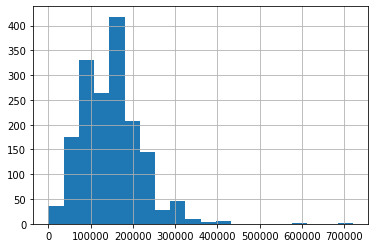

In [17]:
df[df['net_income_from_rur'].notna()]['net_income_from_rur'].hist(bins=20)

<AxesSubplot:>

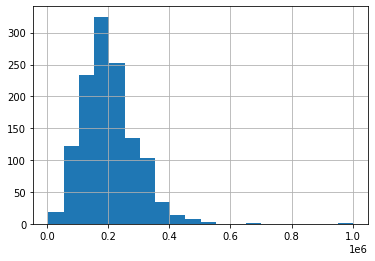

In [21]:
df[df['net_income_to_rur'].notna()]['net_income_to_rur'].hist(bins=20)

<AxesSubplot:>

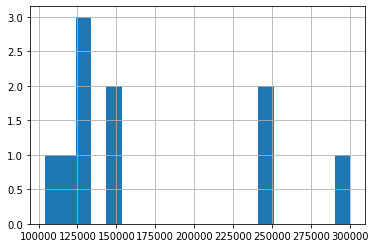

In [32]:
df[df['vacancy_name'].str.contains('middle') & df['net_income_from_rur'].notna()]['net_income_from_rur'].hist(bins=20)

In [33]:
df_salary_range = df[df['net_income_from_rur'].notna() & df['net_income_to_rur'].notna()]
len(df_salary_range)

920

In [37]:
df_salary_range.head()

,vacancy_name,company_name,company_dept,area,address,latitude,longitude,salary_from,salary_to,salary_currency,...,schedule,req,resp,cond,skills,salary_from_rur,salary_to_rur,net_income_from_rur,net_income_to_rur,salary_range
vacancy_id,,,,,,,,,,,,,,,,,,,,,
69452295,Ведущий разработчик с опытом работы с криптогр...,АНДЕКС,NaN,1,NaN,NaN,NaN,300000.0,1000000.0,RUR,...,FULL_DAY,5+ лет в качестве бэкенд-разработчика или разр...,NaN,NaN,NaN,300000.0,1000000.0,300000.0,1000000.0,700000.0
69416476,Middle/Senior embedded software developer (С/С++),РУСИМ,NaN,1,NaN,NaN,NaN,250000.0,300000.0,RUR,...,REMOTE,Уверенное знание архитектуры ARM Cortex. Увере...,"Встраиваемая операционная система SIM-карты ""О...",Официальное оформления согласно ТК РФ. Полный ...,NaN,250000.0,300000.0,250000.0,300000.0,50000.0
69478047,Middle+/Senior Python Developer / Python разра...,Миллениум,NaN,1,NaN,NaN,NaN,150000.0,300000.0,RUR,...,FLEXIBLE,Python 3. Django REST Framework. Huey. Postgre...,Разрабатывать собственные мобильные приложения...,"Работа в комфортном офисе класса ""B+"" в 100 ме...",NaN,150000.0,300000.0,150000.0,300000.0,150000.0
69433037,Django Developer,ЭкспрессДеньги,NaN,1,"Москва, Пресненская набережная, 12",55.749633,37.537434,80000.0,100000.0,RUR,...,FULL_DAY,Опыт разработки на JS фреймворке. Опыт использ...,Разработка веб-приложений с использованием Dja...,"Оформление по ТК РФ с белой зарплатой, оплачив...",NaN,80000.0,100000.0,69600.0,87000.0,17400.0
67163071,Программист Delphi,Мастер Лаб,NaN,1,"Москва, Дмитровское шоссе, 100с2",55.881980,37.547656,140000.0,250000.0,RUR,...,FULL_DAY,"Опыт программирования на Delphi *.*, знание AD...",Работа в области автоматизации медицинских учр...,Офис на Дмитровском шоссе. ГК.,NaN,140000.0,250000.0,121800.0,217500.0,95700.0


In [38]:
df_salary_range['salary_range'] = df_salary_range.apply(lambda x: x['net_income_to_rur'] - x['net_income_from_rur'], axis=1)

C:\Users\sharu\AppData\Local\Temp\ipykernel_9936\1016358961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salary_range['salary_range'] = df_salary_range.apply(lambda x: x['net_income_to_rur'] - x['net_income_from_rur'], axis=1)


<AxesSubplot:>

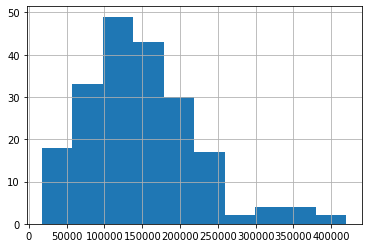

In [51]:
df[df['vacancy_name'].str.lower().str.contains('javascript') | df['req'].str.lower().str.contains('javascript')]['net_income_from_rur'].hist(bins=10)

In [60]:
languages = ['python', 'javascript', 'c++', 'php']
df['language'] = df.apply(lambda x: [lng for lng in languages if ((lng in x['vacancy_name'].lower()) or (lng in str(x['req']).lower()))], axis=1)
df['language'].head()

vacancy_id
69452295                      []
69416476                   [c++]
69478047                [python]
69433037    [python, javascript]
68153308                      []
Name: language, dtype: object

In [61]:
df['language'].value_counts()

[]                           1326
[php]                         252
[javascript]                  181
[python]                      101
[c++]                          67
[javascript, php]              55
[python, c++]                   9
[python, javascript]            4
[c++, php]                      2
[python, php]                   1
[python, javascript, php]       1
[javascript, c++]               1
Name: language, dtype: int64

In [62]:
dev_classes = ['junior', 'middle', 'senior']
df['dev_class'] = df.apply(lambda x: [cls for cls in dev_classes if cls in x['vacancy_name'].lower()], axis=1)
df['dev_class'].head()

vacancy_id
69452295                  []
69416476    [middle, senior]
69478047    [middle, senior]
69433037                  []
68153308                  []
Name: dev_class, dtype: object

In [63]:
df['dev_class'].value_counts()

[]                          1501
[middle]                     187
[senior]                     167
[middle, senior]              65
[junior]                      59
[junior, middle]              20
[junior, middle, senior]       1
Name: dev_class, dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 69452295 to 68660543
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vacancy_name         2000 non-null   object 
 1   company_name         2000 non-null   object 
 2   company_dept         51 non-null     object 
 3   area                 2000 non-null   int64  
 4   address              1022 non-null   object 
 5   latitude             1003 non-null   float64
 6   longitude            1003 non-null   float64
 7   salary_from          1670 non-null   float64
 8   salary_to            1250 non-null   float64
 9   salary_currency      2000 non-null   object 
 10  salary_gross         2000 non-null   bool   
 11  publication_time     2000 non-null   object 
 12  last_changed         2000 non-null   object 
 13  schedule             2000 non-null   object 
 14  req                  1984 non-null   object 
 15  resp                 1904 n

In [68]:
type(df.iloc[1, 23])

list

## Experiments with map visualization

In [18]:
moscow_map = folium.Map(location=[df.iloc[0, 5], df.iloc[0, 6]], zoom_start=12)

In [19]:
vacancies_msk = df[(df['area'] == 1) & (df['latitude'].notna()) & (df['longitude'].notna())].iloc[:10, :]
vacancies_msk

,vacancy_name,company_name,company_dept,area,address,latitude,longitude,salary_from,salary_to,salary_currency,salary_gross,publication_time,last_changed,schedule,req,resp,cond
vacancy_id,,,,,,,,,,,,,,,,,
66764963,Маркетолог-аналитик,Межрегиональный ТранзитТелеком (АО МТТ),NaN,1,"Москва, Марксистская улица, 22с1",55.737694,37.660718,NaN,NaN,NaN,NaN,2022-07-11 08:19:16,2022-07-11 09:36:59,FULL_DAY,Высшее образование (техническое будет плюсом)....,Подготавливать план\факторный анализ по новому...,Оформление по ТК РФ с 1 дня. Возможность работ...
54587889,Middle/Senior Продуктовый аналитик в направлен...,HeadHunter::Analytics/Data Science,HeadHunter::Analytics/Data Science,1,"Москва, улица Годовикова, 9с10",55.809343,37.628505,NaN,NaN,NaN,NaN,2022-07-09 07:46:09,2022-07-09 07:46:09,FULL_DAY,"Знания в области AB-тестирования, современных ...",Проверка продуктовых гипотез для роста ключевы...,Интересные и сложные задачи в рамках ключевых ...
67551709,"Backend developer (Python, PostgreSQL)",Шамсуллин Рустам Радикович,NaN,1,"Москва, Лужнецкая набережная, 2/4с4",55.715489,37.573627,NaN,350000.0,RUR,False,2022-07-06 15:43:19,2022-07-11 19:15:48,FULL_DAY,NaN,Обработку спортивных он-лайн видео-трансляции....,Вторым этапом будет оплачиваемое тестовое зада...
66075789,Middle/Senior продуктовый аналитик в направлен...,HeadHunter::Product Management,HeadHunter::Product Management,1,"Москва, улица Годовикова, 9с10",55.809343,37.628505,NaN,NaN,NaN,NaN,2022-07-09 07:46:09,2022-07-09 07:46:09,FULL_DAY,"...области анализа данных (воронки, когортный ...","Проектировать, сопровождать и оптимизировать с...",Интересные и сложные задачи в рамках ключевых ...
67650008,Аналитик BI,Sminex,NaN,1,"Москва, Кадашёвская набережная, 6/1/2",55.742706,37.617734,180000.0,240000.0,RUR,False,2022-07-11 08:41:40,2022-07-11 14:27:24,FULL_DAY,Опыт работы аналитиком от 2-х лет. Опыт продви...,Ставить технические задачи на выгрузку данных ...,"Разнообразие проектов, сложные и интересные за..."
67664019,Старший аналитик данных,ShinSale,NaN,1,"Москва, улица Бутлерова, 17",55.650150,37.539626,140000.0,200000.0,RUR,False,2022-07-11 12:38:02,2022-07-11 12:38:02,FULL_DAY,Понимание грамотного построения инфраструктуры...,"Определить формат основных дашбордов, запрашив...","Оформление по ТК РФ, белая з/п точно в срок. Г..."
67472214,Data Analyst,КИБЕР-РОМ,NaN,1,"Москва, Рочдельская улица, 15с27",55.754836,37.560565,150000.0,250000.0,RUR,True,2022-07-10 15:02:16,2022-07-10 15:59:17,FULL_DAY,Применение Python в прикладных задачах. Опыт в...,Игровые проекты. Системы рекомендаций и модера...,Стильный просторный лофт на территории Трехгор...
49495729,Ведущий аналитик данных (Департамент закупок),"Красное & Белое, розничная сеть",NaN,1,"Москва, 1-й Красногвардейский проезд, 15",55.750520,37.539401,NaN,300000.0,RUR,False,2022-07-11 07:21:57,2022-07-11 07:21:57,FULL_DAY,"Навыки выдвижения и проверки гипотез, прогнози...","Выявление узких мест, факторов отклонений. Сис...","График работы: пятидневная рабочая неделя, с 9..."
67666515,Аналитик данных / разработчик дашбордов,Сфера,NaN,1,"Москва, Калининская линия",55.758407,37.751538,60000.0,NaN,RUR,False,2022-07-11 13:30:36,2022-07-11 19:37:31,REMOTE,Навыки выявления требований к отчетам/дашборда...,Анализ данных для разработки отчетов. Написани...,Полностью удалённый формат работы. Свободный д...


In [20]:
job_places_msk = folium.map.FeatureGroup()
for n in range(len(vacancies_msk)):
    job_places_msk.add_child(folium.features.CircleMarker([vacancies_msk.iloc[n, 5], vacancies_msk.iloc[n, 6]], radius=3, color='red', fill_color='red'))

In [21]:
moscow_map.add_child(job_places_msk)
moscow_map

In [22]:
from folium.plugins import HeatMap

In [23]:
data = []
for n in range(len(vacancies_msk)):
    data.append([vacancies_msk.iloc[n, 5], vacancies_msk.iloc[n, 6]])
#data.pop(3)
data

[[55.737694, 37.660718],
 [55.809343, 37.628505],
 [55.715489, 37.573627],
 [55.809343, 37.628505],
 [55.742706, 37.617734],
 [55.65015, 37.539626],
 [55.754836, 37.560565],
 [55.75052, 37.539401],
 [55.758407, 37.751538],
 [55.769423, 37.559371]]

In [24]:
HeatMap(data).add_to(folium.FeatureGroup(name='Heat map').add_to(moscow_map))
folium.LayerControl().add_to(moscow_map)
moscow_map

In [25]:
vacancies_msk_with_salary = df[(df['area'] == 1) & df['latitude'].notna() & df['longitude'].notna() & ((df['salary_from'].notna()) | (df['salary_to'].notna()))]
vacancies_msk_with_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590 entries, 67551709 to 66807749
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   vacancy_name      590 non-null    object 
 1   company_name      590 non-null    object 
 2   company_dept      22 non-null     object 
 3   area              590 non-null    int64  
 4   address           590 non-null    object 
 5   latitude          590 non-null    float64
 6   longitude         590 non-null    float64
 7   salary_from       500 non-null    float64
 8   salary_to         336 non-null    float64
 9   salary_currency   590 non-null    object 
 10  salary_gross      590 non-null    object 
 11  publication_time  590 non-null    object 
 12  last_changed      590 non-null    object 
 13  schedule          590 non-null    object 
 14  req               584 non-null    object 
 15  resp              590 non-null    object 
 16  cond              579 non-null  

In [26]:
vacancies_msk_with_salary['salary_currency'].value_counts()

RUR    589
USD      1
Name: salary_currency, dtype: int64

In [27]:
vacancies_msk_with_salary['salary_gross'].value_counts()

False    393
True     197
Name: salary_gross, dtype: int64

In [28]:
df_msk_sal = vacancies_msk_with_salary
vacancies_msk_with_salary = None
df_msk_sal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590 entries, 67551709 to 66807749
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   vacancy_name      590 non-null    object 
 1   company_name      590 non-null    object 
 2   company_dept      22 non-null     object 
 3   area              590 non-null    int64  
 4   address           590 non-null    object 
 5   latitude          590 non-null    float64
 6   longitude         590 non-null    float64
 7   salary_from       500 non-null    float64
 8   salary_to         336 non-null    float64
 9   salary_currency   590 non-null    object 
 10  salary_gross      590 non-null    object 
 11  publication_time  590 non-null    object 
 12  last_changed      590 non-null    object 
 13  schedule          590 non-null    object 
 14  req               584 non-null    object 
 15  resp              590 non-null    object 
 16  cond              579 non-null  

In [29]:
usd_rur_ratio = 60
df_msk_sal['salary_from_rur'] = df_msk_sal.apply(lambda x: x['salary_from'] if x['salary_currency'] in ['RUR', np.NAN] else x['salary_from']*usd_rur_ratio, axis=1)
df_msk_sal['salary_to_rur'] = df_msk_sal.apply(lambda x: x['salary_to'] if x['salary_currency'] in ['RUR', np.NAN] else x['salary_to']*usd_rur_ratio, axis=1)
df_msk_sal[df_msk_sal['salary_currency'] == 'USD']

C:\Users\sharu\AppData\Local\Temp\ipykernel_16232\881088992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_msk_sal['salary_from_rur'] = df_msk_sal.apply(lambda x: x['salary_from'] if x['salary_currency'] in ['RUR', np.NAN] else x['salary_from']*usd_rur_ratio, axis=1)
C:\Users\sharu\AppData\Local\Temp\ipykernel_16232\881088992.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_msk_sal['salary_to_rur'] = df_msk_sal.apply(lambda x: x['salary_to'] if x['salary_currency'] in ['RUR', np.NAN] else x['s

,vacancy_name,company_name,company_dept,area,address,latitude,longitude,salary_from,salary_to,salary_currency,salary_gross,publication_time,last_changed,schedule,req,resp,cond,salary_from_rur,salary_to_rur
vacancy_id,,,,,,,,,,,,,,,,,,,
52563104,UX исследователь / UX Researcher,AMarkets,NaN,1,Подгорица,42.435426,19.263895,NaN,2500.0,USD,False,2022-07-11 18:50:23,2022-07-11 19:19:26,FULL_DAY,Умение работать с веб-аналитикой. Опыт обработ...,Организовать процесс UX-тестирований (web и mo...,Релокацию в европейское подразделение компании...,NaN,150000.0


In [30]:
df_msk_sal['net_income_from_rur'] = df_msk_sal.apply(lambda x: x['salary_from_rur']*0.87 if x['salary_gross'] else x['salary_from_rur'], axis=1)
df_msk_sal['net_income_to_rur'] = df_msk_sal.apply(lambda x: x['salary_to_rur']*0.87 if x['salary_gross'] else x['salary_to_rur'], axis=1)
df_msk_sal.head()

C:\Users\sharu\AppData\Local\Temp\ipykernel_16232\173079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_msk_sal['net_income_from_rur'] = df_msk_sal.apply(lambda x: x['salary_from_rur']*0.87 if x['salary_gross'] else x['salary_from_rur'], axis=1)
C:\Users\sharu\AppData\Local\Temp\ipykernel_16232\173079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_msk_sal['net_income_to_rur'] = df_msk_sal.apply(lambda x: x['salary_to_rur']*0.87 if x['salary_gross'] else x['salary_to_rur'], axis=1)


,vacancy_name,company_name,company_dept,area,address,latitude,longitude,salary_from,salary_to,salary_currency,...,publication_time,last_changed,schedule,req,resp,cond,salary_from_rur,salary_to_rur,net_income_from_rur,net_income_to_rur
vacancy_id,,,,,,,,,,,,,,,,,,,,,
67551709,"Backend developer (Python, PostgreSQL)",Шамсуллин Рустам Радикович,NaN,1,"Москва, Лужнецкая набережная, 2/4с4",55.715489,37.573627,NaN,350000.0,RUR,...,2022-07-06 15:43:19,2022-07-11 19:15:48,FULL_DAY,NaN,Обработку спортивных он-лайн видео-трансляции....,Вторым этапом будет оплачиваемое тестовое зада...,NaN,350000.0,NaN,350000.0
67650008,Аналитик BI,Sminex,NaN,1,"Москва, Кадашёвская набережная, 6/1/2",55.742706,37.617734,180000.0,240000.0,RUR,...,2022-07-11 08:41:40,2022-07-11 14:27:24,FULL_DAY,Опыт работы аналитиком от 2-х лет. Опыт продви...,Ставить технические задачи на выгрузку данных ...,"Разнообразие проектов, сложные и интересные за...",180000.0,240000.0,180000.0,240000.0
67664019,Старший аналитик данных,ShinSale,NaN,1,"Москва, улица Бутлерова, 17",55.650150,37.539626,140000.0,200000.0,RUR,...,2022-07-11 12:38:02,2022-07-11 12:38:02,FULL_DAY,Понимание грамотного построения инфраструктуры...,"Определить формат основных дашбордов, запрашив...","Оформление по ТК РФ, белая з/п точно в срок. Г...",140000.0,200000.0,140000.0,200000.0
67472214,Data Analyst,КИБЕР-РОМ,NaN,1,"Москва, Рочдельская улица, 15с27",55.754836,37.560565,150000.0,250000.0,RUR,...,2022-07-10 15:02:16,2022-07-10 15:59:17,FULL_DAY,Применение Python в прикладных задачах. Опыт в...,Игровые проекты. Системы рекомендаций и модера...,Стильный просторный лофт на территории Трехгор...,150000.0,250000.0,130500.0,217500.0
49495729,Ведущий аналитик данных (Департамент закупок),"Красное & Белое, розничная сеть",NaN,1,"Москва, 1-й Красногвардейский проезд, 15",55.750520,37.539401,NaN,300000.0,RUR,...,2022-07-11 07:21:57,2022-07-11 07:21:57,FULL_DAY,"Навыки выдвижения и проверки гипотез, прогнози...","Выявление узких мест, факторов отклонений. Сис...","График работы: пятидневная рабочая неделя, с 9...",NaN,300000.0,NaN,300000.0


In [31]:
df_msk_sal[df_msk_sal['salary_gross']].iloc[:5, :]

,vacancy_name,company_name,company_dept,area,address,latitude,longitude,salary_from,salary_to,salary_currency,...,publication_time,last_changed,schedule,req,resp,cond,salary_from_rur,salary_to_rur,net_income_from_rur,net_income_to_rur
vacancy_id,,,,,,,,,,,,,,,,,,,,,
67472214,Data Analyst,КИБЕР-РОМ,NaN,1,"Москва, Рочдельская улица, 15с27",55.754836,37.560565,150000.0,250000.0,RUR,...,2022-07-10 15:02:16,2022-07-10 15:59:17,FULL_DAY,Применение Python в прикладных задачах. Опыт в...,Игровые проекты. Системы рекомендаций и модера...,Стильный просторный лофт на территории Трехгор...,150000.0,250000.0,130500.0,217500.0
66877134,Аналитик SQL,Группа Актион,NaN,1,"Москва, 1-й Земельный переулок, 7/2",55.769423,37.559371,90000.0,130000.0,RUR,...,2022-07-11 05:46:53,2022-07-11 05:46:53,REMOTE,"Имеет высшее профильное образование, дружит с ...",Предстоит трудиться в различных жанрах: Обновл...,Работу в крупнейшем медиа холдинге. Офис в 5-т...,90000.0,130000.0,78300.0,113100.0
66982374,Аналитик,ФГБНУ Аналитический центр,NaN,1,"Москва, улица Талалихина, 33с4",55.731065,37.682089,100000.0,NaN,RUR,...,2022-07-11 07:47:35,2022-07-11 07:59:57,FULL_DAY,Знание законодательства РФ и иных нормативных ...,...по совершенствованию порядка предоставления...,NaN,100000.0,NaN,87000.0,NaN
67363658,Старший системный аналитик,Системы Распределенного Реестра,NaN,1,"Москва, Композиторская улица, 17",55.751229,37.586311,280000.0,300000.0,RUR,...,2022-07-12 07:35:02,2022-07-12 08:00:53,REMOTE,Опыт работы в IT Компаниях на аналогичной долж...,Диаграмма бизнес-процессов и информационных по...,"Полностью “белая” зарплата, оформление по ТК Р...",280000.0,300000.0,243600.0,261000.0
67684081,Стажер-аналитик,Райффайзен Банк,NaN,1,"Москва, проспект Андропова, 18к2",55.695611,37.662371,NaN,60000.0,RUR,...,2022-07-12 06:44:14,2022-07-12 06:51:47,FULL_DAY,Образование: выпускник или студент последних к...,Участие в подготовке регулярной отчетности для...,Официальное трудоустройство в штат на срочный ...,NaN,60000.0,NaN,52200.0


In [32]:
df_msk_sal_range = df_msk_sal[df_msk_sal['salary_from'].notna() & df_msk_sal['salary_to'].notna()]
df_msk_sal_range.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 67650008 to 50804500
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vacancy_name         246 non-null    object 
 1   company_name         246 non-null    object 
 2   company_dept         8 non-null      object 
 3   area                 246 non-null    int64  
 4   address              246 non-null    object 
 5   latitude             246 non-null    float64
 6   longitude            246 non-null    float64
 7   salary_from          246 non-null    float64
 8   salary_to            246 non-null    float64
 9   salary_currency      246 non-null    object 
 10  salary_gross         246 non-null    object 
 11  publication_time     246 non-null    object 
 12  last_changed         246 non-null    object 
 13  schedule             246 non-null    object 
 14  req                  244 non-null    object 
 15  resp                 246 non

In [33]:
net_min_salary_weights = list(df_msk_sal_range['net_income_from_rur'] / max(df_msk_sal_range['net_income_from_rur']))
moscow_map = folium.Map(location=[df_msk_sal_range.iloc[0, 5], df_msk_sal_range.iloc[0, 6]], zoom_start=11)
data = []
for n in range(len(df_msk_sal_range)):
    data.append([df_msk_sal_range.iloc[n, 5], df_msk_sal_range.iloc[n, 6], net_min_salary_weights[n]])
HeatMap(data, radius=15).add_to(folium.FeatureGroup(name='Heat map').add_to(moscow_map))
folium.LayerControl().add_to(moscow_map)
moscow_map

<AxesSubplot:>

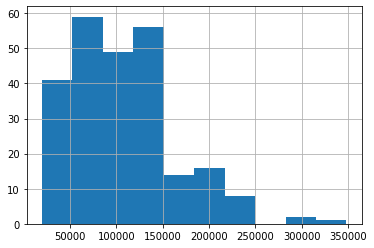

In [34]:
df_msk_sal_range['net_income_from_rur'].hist()

<AxesSubplot:>

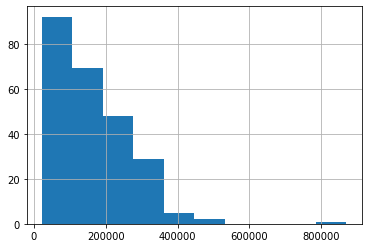

In [35]:
df_msk_sal_range['net_income_to_rur'].hist()

In [36]:
df_msk_sal_range['top_bottom_net_income_ratio'] = df_msk_sal_range['net_income_to_rur'] / df_msk_sal_range['net_income_from_rur']

C:\Users\sharu\AppData\Local\Temp\ipykernel_16232\659412442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_msk_sal_range['top_bottom_net_income_ratio'] = df_msk_sal_range['net_income_to_rur'] / df_msk_sal_range['net_income_from_rur']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'Net income bottom level')

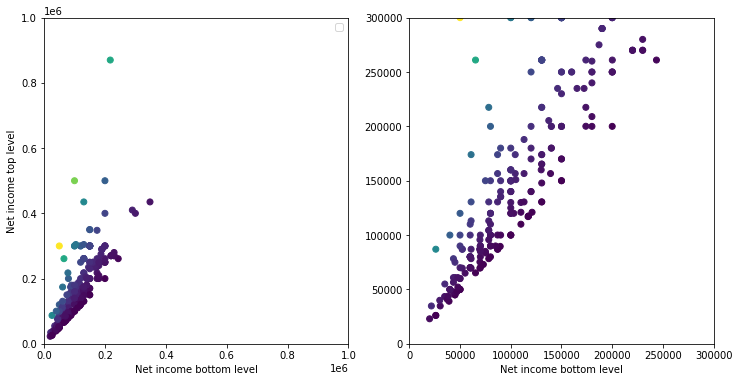

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharex=False, sharey=False)
axs[0].scatter(df_msk_sal_range['net_income_from_rur'], df_msk_sal_range['net_income_to_rur'], c=df_msk_sal_range['top_bottom_net_income_ratio'])
axs[0].set_xlim(left=0, right=1000000)
axs[0].set_ylim(bottom=0, top=1000000)
axs[0].set_xlabel('Net income bottom level')
axs[0].set_ylabel('Net income top level')
axs[1].scatter(df_msk_sal_range['net_income_from_rur'], df_msk_sal_range['net_income_to_rur'], c=df_msk_sal_range['top_bottom_net_income_ratio'])
axs[1].set_xlim(left=0, right=300000)
axs[1].set_ylim(bottom=0, top=300000)
axs[1].set_xlabel('Net income bottom level')

<AxesSubplot:>

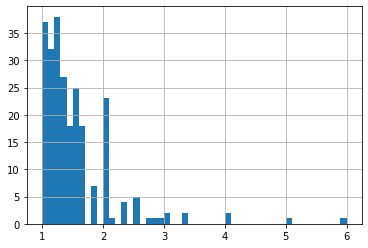

In [73]:
df_msk_sal_range['top_bottom_net_income_ratio'].hist(bins=50)

In [78]:
min_ratio = min(df_msk_sal_range['top_bottom_net_income_ratio'])
df_msk_sal_range[df_msk_sal_range['top_bottom_net_income_ratio'] == min_ratio].iloc[:5, :]

,vacancy_name,company_name,company_dept,area,address,latitude,longitude,salary_from,salary_to,salary_currency,...,last_changed,schedule,req,resp,cond,salary_from_rur,salary_to_rur,net_income_from_rur,net_income_to_rur,top_bottom_net_income_ratio
vacancy_id,,,,,,,,,,,,,,,,,,,,,
67526996,Младший аналитик,ГКБ ИМ. И.В. ДАВЫДОВСКОГО ДЗМ,NaN,1,"Москва, Яузская улица, 11",55.746927,37.648214,45000.0,45000.0,RUR,...,2022-07-11 08:51:53,FULL_DAY,Высшее образование. Опыт работы от года. Опытн...,...установленной ежедневной отчетности(несколь...,"Работа в современной, высокотехнологичной мног...",45000.0,45000.0,45000.0,45000.0,1.0
67669742,Стажер (продуктовый аналитик),L’etoile Digital,NaN,1,"Москва, Одесская улица, 2кА",55.664472,37.599238,30000.0,30000.0,RUR,...,2022-07-11 14:56:39,FULL_DAY,"Обладаешь знанием в области AB-тестирования, с...",Проведение проверки продуктовых гипотез для ро...,Стажерская программа предусмотрена для студент...,30000.0,30000.0,26100.0,26100.0,1.0
67599030,Системный аналитик JUNE,Sitronics Group,NaN,1,"Москва, Волгоградский проспект, 32к31",55.718659,37.689905,50000.0,50000.0,RUR,...,2022-07-11 08:21:17,FULL_DAY,Профильное образованием или законченные курсы ...,Создание и согласование проектной документации...,Интересная работа в динамичной ИТ компании. Ко...,50000.0,50000.0,50000.0,50000.0,1.0
67473710,Аналитик,Центр развития Среда возможностей,NaN,1,"Москва, Волгоградский проспект, 42",55.705858,37.725487,150000.0,150000.0,RUR,...,2022-07-04 16:17:14,FULL_DAY,"...массивов данных, описания тенденций, формир...",Формировать презентационные материалы компании...,"Пятидневная рабочая неделя (суббота, воскресен...",150000.0,150000.0,130500.0,130500.0,1.0
67532829,Аналитик,ФБУЗ ФЦГиЭ Роспотребнадзора,NaN,1,"Москва, Варшавское шоссе, 19А",55.695829,37.623349,45000.0,45000.0,RUR,...,2022-07-06 12:08:40,FULL_DAY,Склонность к анализу информации и теоретическо...,Подготовка стандартизированной отчетности. Раз...,"Понедельник - пятница с 9.00 до 17.30 час., су...",45000.0,45000.0,45000.0,45000.0,1.0
67511084,Бизнес-аналитик (проект Data governance),Отраслевой центр разработки и внедрения информ...,NaN,1,"Москва, Каланчевская, 13",55.771211,37.651313,135000.0,135000.0,RUR,...,2022-07-05 13:53:15,FULL_DAY,Будет преимуществом: опыт работы в data govern...,"Обследование бизнес-процессов, подлежащих авто...",Работа в крупной стабильной компании. Участие ...,135000.0,135000.0,117450.0,117450.0,1.0
67285843,Аналитик,Центр развития Среда возможностей,NaN,1,"Москва, Волгоградский проспект, 42к13",55.710190,37.721265,150000.0,150000.0,RUR,...,2022-07-11 08:17:35,FULL_DAY,Опыт работы с информацией по следующей тематик...,Формировать презентационные материалы компании...,Официальное трудоустройство в подведомственное...,150000.0,150000.0,130500.0,130500.0,1.0
67126743,Ассистент аналитика,ANCOR,ANCOR,1,"Москва, бульвар Энтузиастов, 2",55.746363,37.682077,50000.0,50000.0,RUR,...,2022-07-12 06:31:01,FULL_DAY,"Владение ПК: Excel, Power Point, на уровне уве...","Работа с базами данных (адресные программы, ма...",Оформление по ТК. Заработная плата 50 000 рубл...,50000.0,50000.0,50000.0,50000.0,1.0
67104426,Аналитик,Федорово Минералз,NaN,1,"Москва, Западный административный округ, Можай...",55.695256,37.347081,80000.0,80000.0,RUR,...,2022-06-23 08:35:24,FULL_DAY,Отличное знание Excel. Умение работать с больш...,Ведение аналитических данных формирования лото...,Работа в современном офисе в Сколково с 09.00 ...,80000.0,80000.0,69600.0,69600.0,1.0


In [ ]:
moscow_map = folium.Map(location=[df_msk_sal_range.iloc[0, 5], df_msk_sal_range.iloc[0, 6]], zoom_start=11)
job_places_msk = folium.map.FeatureGroup()
for n in range(len(vacancies_msk)):
    job_places_msk.add_child(folium.features.CircleMarker([vacancies_msk.iloc[n, 5], vacancies_msk.iloc[n, 6]], radius=3, color='red', fill_color='red'))
moscow_map.add_child(job_places_msk)
moscow_map